**Корректность проверена на Python 3.7:**
+ numpy 1.14.5

# Доверительные интервалы для доли 

## Генерация данных

In [2]:
import numpy as np

In [3]:
print(np.__version__)

1.19.4


In [4]:
np.random.seed(1)

statistical_population = np.random.randint(2, size = 100000) 

random_sample = np.random.choice(statistical_population, size = 1000)

In [5]:
#истинное значение доли
statistical_population.mean()

0.49771

## Точечная оценка доли

In [6]:
random_sample.mean()

0.502

## Доверительный интервал для доли

In [7]:
from statsmodels.stats.proportion import proportion_confint

### Доверительный интервал на основе нормального распределения

$$\hat{p}\pm z_{1-\frac{\alpha}{2}} \sqrt{\frac{\hat{p}\left(1-\hat{p}\right)}{n}}$$

In [8]:
normal_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'normal')

In [9]:
print('normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1], 
                                                  normal_interval[1] - normal_interval[0]))

normal_interval [0.471010, 0.532990] with width 0.061979


### Доверительный интервал Уилсона

$$\frac1{ 1 + \frac{z^2}{n} } \left( \hat{p} + \frac{z^2}{2n} \pm z \sqrt{ \frac{ \hat{p}\left(1-\hat{p}\right)}{n} + \frac{
z^2}{4n^2} } \right), \;\; z \equiv z_{1-\frac{\alpha}{2}}$$ 

In [10]:
wilson_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'wilson')

In [11]:
print('wilson_interval [%f, %f] with width %f' % (wilson_interval[0],
                                                  wilson_interval[1],
                                                  wilson_interval[1] - wilson_interval[0]))

wilson_interval [0.471062, 0.532922] with width 0.061860


## Размер выборки для интервала заданной ширины

In [12]:
from statsmodels.stats.proportion import samplesize_confint_proportion

In [13]:
n_samples = int(np.ceil(samplesize_confint_proportion(random_sample.mean(), 0.01)))
n_samples

9604

In [14]:
np.random.seed(1)
random_sample = np.random.choice(statistical_population, size = n_samples)

In [15]:
normal_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'normal')

In [16]:
print('normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1],
                                                  normal_interval[1] - normal_interval[0]))

normal_interval [0.481776, 0.501773] with width 0.019997


In [17]:
proportion_confint(1, 50, method = 'wilson')[0].round(4)

0.0035

In [18]:
int(np.ceil(samplesize_confint_proportion(0.5, 0.01)))

9604

In [19]:
p = np.linspace(0.01, 1, 200)

In [20]:
p 

array([0.01      , 0.01497487, 0.01994975, 0.02492462, 0.0298995 ,
       0.03487437, 0.03984925, 0.04482412, 0.04979899, 0.05477387,
       0.05974874, 0.06472362, 0.06969849, 0.07467337, 0.07964824,
       0.08462312, 0.08959799, 0.09457286, 0.09954774, 0.10452261,
       0.10949749, 0.11447236, 0.11944724, 0.12442211, 0.12939698,
       0.13437186, 0.13934673, 0.14432161, 0.14929648, 0.15427136,
       0.15924623, 0.16422111, 0.16919598, 0.17417085, 0.17914573,
       0.1841206 , 0.18909548, 0.19407035, 0.19904523, 0.2040201 ,
       0.20899497, 0.21396985, 0.21894472, 0.2239196 , 0.22889447,
       0.23386935, 0.23884422, 0.2438191 , 0.24879397, 0.25376884,
       0.25874372, 0.26371859, 0.26869347, 0.27366834, 0.27864322,
       0.28361809, 0.28859296, 0.29356784, 0.29854271, 0.30351759,
       0.30849246, 0.31346734, 0.31844221, 0.32341709, 0.32839196,
       0.33336683, 0.33834171, 0.34331658, 0.34829146, 0.35326633,
       0.35824121, 0.36321608, 0.36819095, 0.37316583, 0.37814

In [21]:
y = [int(np.ceil(samplesize_confint_proportion(i, 0.01))) for i in p]

In [22]:
y

[381,
 567,
 752,
 934,
 1115,
 1293,
 1470,
 1645,
 1818,
 1989,
 2159,
 2326,
 2491,
 2655,
 2816,
 2976,
 3134,
 3290,
 3444,
 3596,
 3746,
 3895,
 4041,
 4185,
 4328,
 4469,
 4608,
 4744,
 4879,
 5013,
 5144,
 5273,
 5400,
 5526,
 5649,
 5771,
 5891,
 6009,
 6125,
 6239,
 6351,
 6461,
 6570,
 6676,
 6781,
 6883,
 6984,
 7083,
 7180,
 7275,
 7368,
 7460,
 7549,
 7636,
 7722,
 7806,
 7887,
 7967,
 8045,
 8121,
 8195,
 8268,
 8338,
 8406,
 8473,
 8538,
 8600,
 8661,
 8720,
 8777,
 8832,
 8885,
 8937,
 8986,
 9034,
 9079,
 9123,
 9165,
 9205,
 9243,
 9279,
 9313,
 9345,
 9376,
 9404,
 9431,
 9456,
 9479,
 9499,
 9518,
 9536,
 9551,
 9564,
 9575,
 9585,
 9593,
 9598,
 9602,
 9604,
 9604,
 9602,
 9598,
 9592,
 9585,
 9575,
 9564,
 9551,
 9535,
 9518,
 9499,
 9478,
 9455,
 9431,
 9404,
 9376,
 9345,
 9313,
 9279,
 9242,
 9204,
 9164,
 9123,
 9079,
 9033,
 8986,
 8936,
 8885,
 8832,
 8776,
 8719,
 8660,
 8600,
 8537,
 8472,
 8406,
 8337,
 8267,
 8195,
 8120,
 8044,
 7966,
 7886,
 7805,
 77

In [23]:
import matplotlib.pyplot as plt

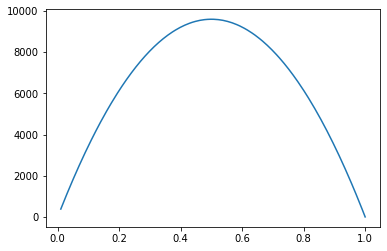

In [24]:
plt.plot(p, y)

In [25]:
max(y)

9604

In [26]:
import scipy.stats as sts
def my_proportion_confint(count, nobs, alpha=0.05, method='normal'):
    q_ = count * 1. / nobs
    alpha_2 = 0.5 * alpha
    std_ = np.sqrt(q_ * (1 - q_) / nobs)
    dist = sts.norm.isf(alpha / 2.) * std_
    ci_low = q_ - dist
    ci_upp = q_ + dist
    return ci_low, ci_upp

In [27]:
my_proportion_confint(1,50)[0].round(4)

-0.0188

In [28]:
sts.norm.ppf(1 - 0.003/2)

2.9677379253417944

In [1]:
1 - 0.997

0.0030000000000000027

In [34]:
np.round(189/11034 -104/11037, 4)

0.0077